# 木構造を python で記述する

やり方はいくつかあると思うけど，
- 自分ですべて実装する: メリットとして構造の理解は進むけど，描画したりするのは結構めんどうかも
- なんらかのパッケージ: メリットとして，描画とかで悩まないで住むけど，木構造に特化したというものもそれほどない
ということで，悩んだけど，描画系とかのメリットをとって，ここでは ``networkx`` をつかうこととする．

Networkx に関しては，ここらへんで

- 本家 https://networkx.org/
- あとは graphviz を入れないとうまく動かないので，こちらも https://graphviz.org/ 


どうせ，あとでグラフ構造の記述で使うことになるし

In [2]:
import networkx as nx
import matplotlib.pylab as plt

# b^2 - 4 * a * c という式木を作る
G = nx.Graph()
G.add_nodes_from(['-', '^', '*', 'b', '2', '4', 'a', 'c'])

G.add_edges_from([['-', '^'], ['-', '*']])
G.add_edges_from([['^', 'b'], ['^', '2']])
G.add_edges_from([['*', '4'], ['*', 'a'], ['*', 'c']])

# nx.draw_networkx(G) #これだと木にならないなぁ．．．

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_size=4000, 
        node_color="skyblue", font_size=20, width=2, edge_color="gray")
plt.title("Tree Structure")
plt.show()



ImportError: requires pygraphviz http://pygraphviz.github.io/

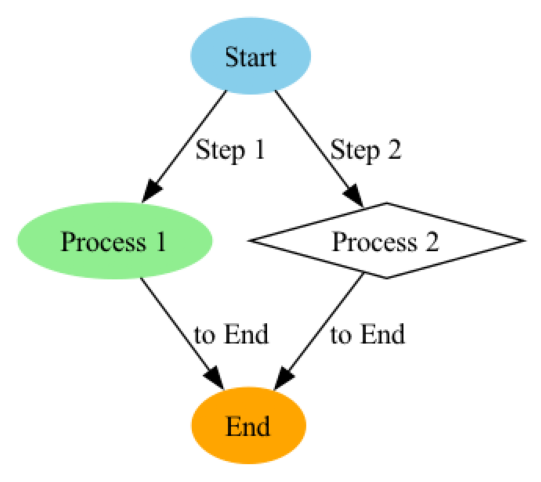

グラフを 'graph.png' として保存しました。


In [3]:
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. NetworkXでグラフを作成
G = nx.DiGraph() # 有向グラフを作成

# ノードとエッジを追加
G.add_node("A", label="Start", color="skyblue", style="filled")
G.add_node("B", label="Process 1", color="lightgreen", style="filled")
G.add_node("C", label="Process 2", shape="diamond") # ノードの形を変更
G.add_node("D", label="End", color="orange", style="filled")

G.add_edge("A", "B", label="Step 1")
G.add_edge("A", "C", label="Step 2")
G.add_edge("B", "D", label="to End")
G.add_edge("C", "D", label="to End")

# 2. NetworkXグラフをpydotグラフに変換
pdot = to_pydot(G)

# 3. pydotグラフを画像ファイルとして保存
# format='png' や 'svg' など、Graphvizがサポートする形式を指定可能
pdot.write_png('graph.png')

# 4. (任意) 保存した画像をMatplotlibで表示
img = mpimg.imread('graph.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off') # 軸を非表示
plt.show()

print("グラフを 'graph.png' として保存しました。")